# Data Engineering and Plotting

## Importing CSV data


In [1]:
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('HedgeFunds.csv')
 
# displaying the contents of the CSV file
csvFile

,Row Labels,Days,HFRX Absolute Return Index,HFRX ED: Distressed Restructuring Index,HFRX ED: Merger Arbitrage Index,HFRX ED: Special Situations Index,HFRX EH: Equity Market Neutral Index,HFRX EH: Fundamental Growth Index,HFRX EH: Fundamental Value Index,HFRX Emerging Markets Composite Index,HFRX Equal Weighted Strategies CHF Index,HFRX Equal Weighted Strategies EUR Index
0,4/16/2012,0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,4/17/2012,1,100.136953,99.945672,100.162017,100.715044,99.925062,100.208337,100.313160,99.932780,100.160250,100.147139
2,4/18/2012,2,100.212804,99.987927,100.188361,100.865248,100.059326,100.543285,100.343945,100.085781,100.196670,100.190527
3,4/19/2012,3,100.380308,100.015091,100.152138,100.705150,99.817860,100.493043,100.490441,100.098824,100.140016,100.128275
4,4/20/2012,4,100.371880,99.984909,100.214047,100.805886,99.777269,100.641090,100.424624,100.278913,100.176437,100.166946
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,4/8/2016,1453,107.561919,88.697848,116.586975,104.179633,105.625520,100.738225,114.224902,88.881587,98.709907,100.655524
1004,4/11/2016,1456,107.625128,88.816564,116.572486,103.968268,105.712947,100.765021,114.217471,89.050139,98.728522,100.679104
1005,4/12/2016,1457,107.625128,89.136493,116.670618,103.934090,105.221690,100.690662,114.473307,89.503624,98.728522,100.683820
1006,4/13/2016,1458,107.591416,89.656629,116.598830,104.518717,104.804330,101.054416,115.463742,89.751436,98.989131,100.953576


In [95]:
hedgeFundValues = csvFile.values
hedgeFundValues

array([['4/16/2012', 0, 100.0, ..., 100.0, 100.0, 100.0],
       ['4/17/2012', 1, 100.1369531, ..., 99.93277985, 100.1602499,
        100.1471393],
       ['4/18/2012', 2, 100.2128041, ..., 100.0857809, 100.1966704,
        100.1905265],
       ...,
       ['4/12/2016', 1457, 107.6251277, ..., 89.50362437, 98.72852206,
        100.6838203],
       ['4/13/2016', 1458, 107.5914162, ..., 89.75143595, 98.98913052,
        100.9535757],
       ['4/14/2016', 1459, 107.6377696, ..., 89.80862324, 98.9624222,
        100.9281093]], dtype=object)

In [22]:
import datetime
datetime.date(2021, 10, 2)

datetime.date(2021, 10, 2)

In [23]:
from datetime import datetime
print(datetime.strptime('2/10/2021','%d/%m/%Y'))

2021-10-02 00:00:00


In [75]:
print(datetime.strptime(hedgeFundValues[1,0],'%m/%d/%Y'))

2012-04-17 00:00:00


In [27]:
rows, cols = hedgeFundValues.shape
(rows, cols)

(1008, 12)

In [96]:
col_time = hedgeFundValues[:, 0]
values = hedgeFundValues[:, 0]
for i in range(0, rows):
  col_time[i] = datetime.strptime(values[i],'%m/%d/%Y')

In [97]:
col_time[:10]

array([datetime.datetime(2012, 4, 16, 0, 0),
       datetime.datetime(2012, 4, 17, 0, 0),
       datetime.datetime(2012, 4, 18, 0, 0),
       datetime.datetime(2012, 4, 19, 0, 0),
       datetime.datetime(2012, 4, 20, 0, 0),
       datetime.datetime(2012, 4, 23, 0, 0),
       datetime.datetime(2012, 4, 24, 0, 0),
       datetime.datetime(2012, 4, 25, 0, 0),
       datetime.datetime(2012, 4, 26, 0, 0),
       datetime.datetime(2012, 4, 27, 0, 0)], dtype=object)

In [98]:
hedgeFundValues = csvFile.values
col_timedays = hedgeFundValues[:, 0]
col_timerata = hedgeFundValues[:, 0]
for i in range(0,rows):
  diff = col_time[i] - col_time[0]
  col_timedays[i] = diff.total_seconds()*1000
  col_timerata[i] = int(col_timedays[i]/(24*3600*1000))

In [102]:
col_timerata[0:10]

array([0, 1, 2, 3, 4, 7, 8, 9, 10, 11], dtype=object)

In [105]:
import matplotlib.pyplot as plt

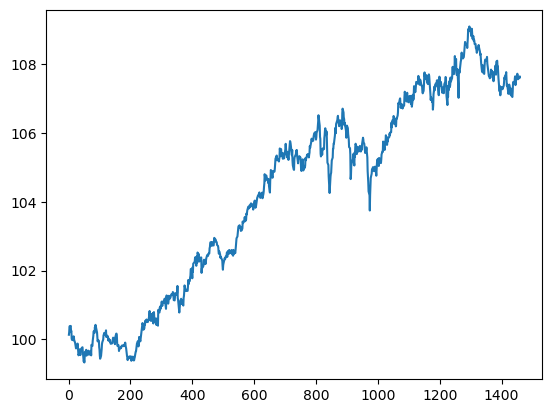

In [106]:
x = hedgeFundValues[1:, 1]
y = hedgeFundValues[1:, 2]
plt.plot(x, y)

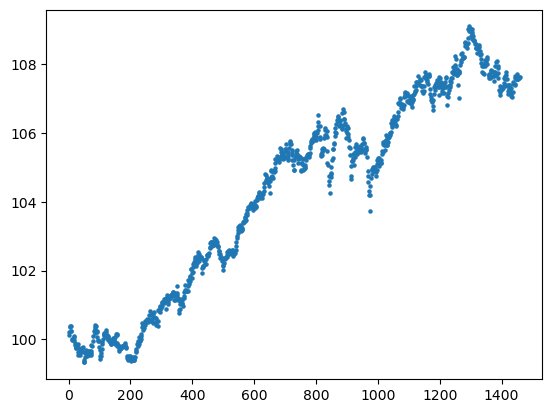

In [117]:
plt.scatter(x, y, s = 5)

Text(0.5, 1.0, 'HF fund values')

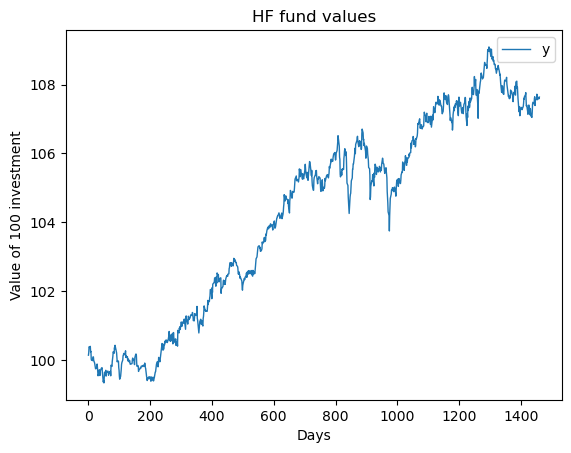

In [122]:
plt.plot(x, y, linewidth = 1,
         markerfacecolor='blue', markersize=5)

# naming the legend
plt.legend('y1')
# naming the x axis
plt.xlabel('Days')
# naming the y axis
plt.ylabel('Value of 100 investment')
  
# giving a title to my graph
plt.title('HF fund values')
             

In [123]:
plt.savefig("thisFig_py.png")

<Figure size 640x480 with 0 Axes>

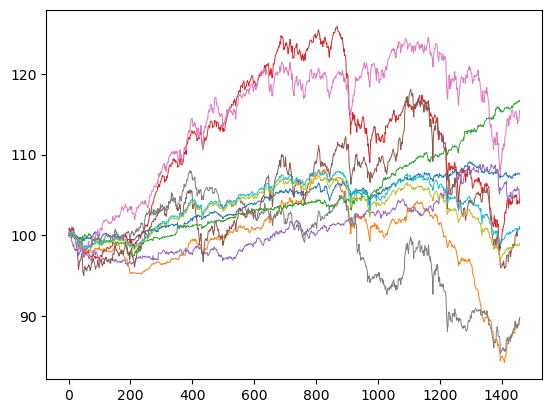

In [136]:
x = hedgeFundValues[1:, 1]
ys = hedgeFundValues[1:, 2:]
plt.plot(x, ys, linewidth = 0.7)

In [129]:
hedgeFundValues.shape[1]

12

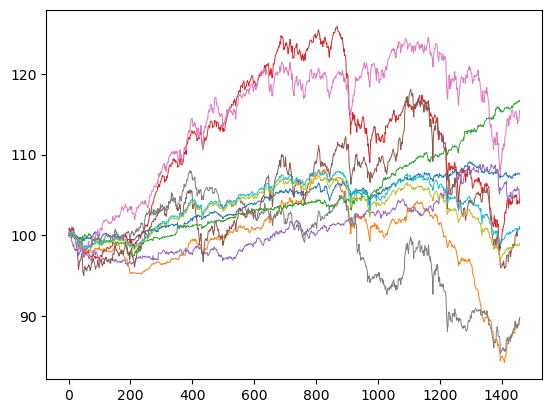

In [137]:
for col in range(2, hedgeFundValues.shape[1]):
  plt.plot(x, hedgeFundValues[1:, col], linewidth = 0.7)

plt.show()

Text(0.5, 1.0, 'HF values')

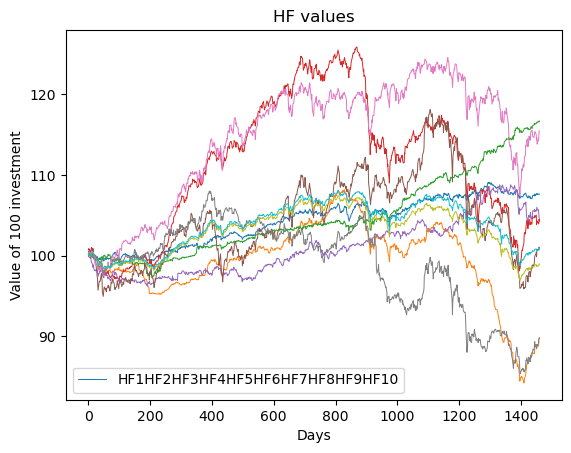

In [138]:
plt.plot(x, ys, linewidth = 0.7)

# naming the legend
plt.legend(["HF1" "HF2" "HF3" "HF4" "HF5" "HF6" "HF7" "HF8" "HF9" "HF10"])
# naming the x axis
plt.xlabel('Days')
# naming the y axis
plt.ylabel('Value of 100 investment')
  
# giving a title to my graph
plt.title('HF values')


## Alphavantage

In [139]:
# MyKey = "DT1N21YO61HVHXQT" #hamid.arian1729
# MyKey = "7ZCSY99XJ9QMLB66" #a1r7i2a9n
MyKey = "HCW8TQRE1NFAEJH7" #risklab.me
print("MyKey loaded successfully!")

MyKey loaded successfully!


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [141]:
pip install alphavantage

  Created wheel for foil: filename=foil-0.2.7-py36, py35-none-any.whl size=17258 sha256=413d8f07fb4c435c0fc5b56c590f60e732e8c4dbbaf5c51f90d919b5183312ca
  Stored in directory: c:\users\rr\appdata\local\pip\cache\wheels\da\9a\50\9d2d664fbde22fbb552bbd2b0e31ca879d7c1b82f00e0f2ad4
Successfully built foil
Note: you may need to restart the kernel to use updated packages.


In [194]:
import requests
import pandas as pd
API_URL = "https://www.alphavantage.co/query" 
symbol = 'SPY'
data = { "function": "TIME_SERIES_DAILY", 
    "symbol": symbol,
    "outputsize" : "full",
    "datatype": "json", 
    "apikey": MyKey }
response = requests.get(API_URL, data) 
response_json = response.json() # maybe redundant
data = pd.DataFrame.from_dict(response_json['Time Series (Daily)'], orient= 'index').sort_index(axis=1)
data = data.rename(columns={ '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close','5. volume': 'Volume'})
data = data[[ 'Open', 'High', 'Low', 'Close', 'Volume']]
data.head() # check OK or not

,Open,High,Low,Close,Volume
2022-09-14,394.4700,396.2000,391.1200,394.6000,85023747
2022-09-13,401.8300,403.1000,391.9200,393.1000,122947081
2022-09-12,408.7800,411.7300,408.4600,410.9700,69256262
2022-09-09,402.7400,407.5100,402.4600,406.6000,76706918
2022-09-08,395.3900,400.8600,394.1200,400.3800,80821681


In [195]:
col_time = data.index.values[:100]
for i in range(0, 100):
  col_time[i] = datetime.strptime(data.index[i],'%Y-%m-%d')
price = [int(float(element)) for element in data.Open.values[:100]]

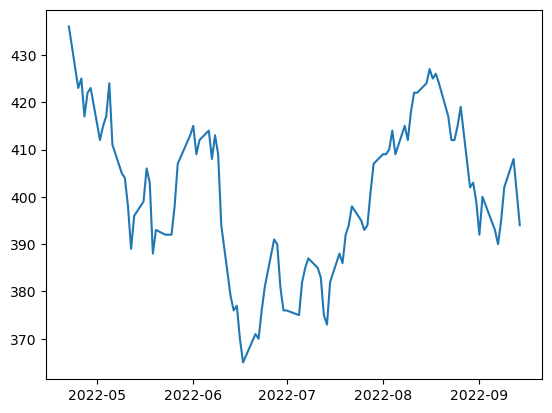

In [196]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(col_time, price)

In [209]:
import requests
import pandas as pd
API_URL = "https://www.alphavantage.co/query" 
symbol = 'ETH'
data = { "function": "DIGITAL_CURRENCY_DAILY", 
    "symbol": symbol,
    "market" : "CNY",
    "outputsize" : "full",
    "datatype": "json", 
    "apikey": MyKey }
response = requests.get(API_URL, data) 
response_json = response.json() # maybe redundant
data = pd.DataFrame.from_dict(response_json['Time Series (Digital Currency Daily)'], orient= 'index').sort_index(axis=1)
data = data.rename(columns={ '1b. open (USD)': 'Open', '2b. high (USD)': 'High', '3b. low (USD)': 'Low', '4b. close (USD)': 'Close', '5. volume' :'Volume','6. market cap (USD)': 'MarketCap'})
data = data[[ 'Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap']]
data.head() # check OK or not

,Open,High,Low,Close,Volume,MarketCap
2022-09-15,1638.40000000,1655.20000000,1599.09000000,1627.59000000,126922.10450000,126922.10450000
2022-09-14,1574.40000000,1647.01000000,1552.38000000,1638.39000000,764562.53930000,764562.53930000
2022-09-13,1716.37000000,1760.51000000,1560.54000000,1574.40000000,1134549.72560000,1134549.72560000
2022-09-12,1766.12000000,1783.00000000,1693.00000000,1716.37000000,630774.60320000,630774.60320000
2022-09-11,1774.12000000,1789.00000000,1720.10000000,1766.11000000,409287.72630000,409287.72630000


In [212]:
col_time = data.index.values
for i in range(0, 1000):
  col_time[i] = datetime.strptime(data.index[i],'%Y-%m-%d')
price = [int(float(element)) for element in data.Open.values]

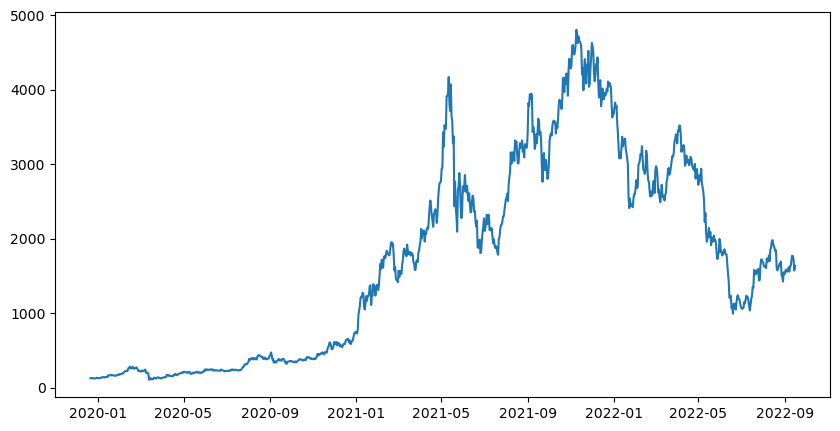

In [218]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(col_time, price)

# Writing/Reading Files


In [219]:
with open("test.txt", "w") as f:
    f.write("This is a test.\n")
    f.write("I repeat, this is a test.\n")

with open("test.txt") as f:
    for line in f.readlines():
        line = line.rstrip("\n")
        print(f"[{line}]")

[This is a test.]
[I repeat, this is a test.]


Alternatively, you can read the whole file into a string:

In [221]:
with open("test.txt") as f:
    s = f.read()
s

'This is a test.\nI repeat, this is a test.\n'